In [20]:
import pandas as pd
import numpy as np

# Cargar los datos desde el archivo CSV
df = pd.read_csv("orp_lupita.csv")
len(df)

198

In [21]:
a = (["b","c"])
a_upper = [x.upper() for x in a]
print(a_upper)

['B', 'C']


In [22]:
df.columns

Index(['no.experimento', 'tipo.de.muestra', 'nombre', 'fecha',
       'diagnostico.espermograma', 'protocolo', 'nec', 'edad', 'pareja',
       't.aox', 'rdx.orp', 'rdx.cap', 'miox.orp.no. norm', 'miox.orp.norm',
       'concentracion', 'espermatozoides.normales',
       'espermatozoides.anormales', 'defectos.cabeza', 'defectos.cuello',
       'defectos.cola', 'mov.pre.grad.a', 'mov.pre.grad.b', 'mov.pre.grad.c',
       'mov.pre.grad.d', 'mov.post.grad.a', 'mov.post.grad.b',
       'mov.post.grad.c', 'mov.post.grad.d', 'vitalidad.disc',
       'vitalidad.fluo', 'em', 'ca.basal', 'tau.up', 'delta', 'tau.down',
       'duracion', 'auc', 't.inseminacion', 'porcentaje.fecundacion',
       'emb.dia.2.no.bloqueados', 'emb.dia.2.cuatro.blastomeras',
       'blastos.usables.dia.5', 'blastos.expandidos.dia.5',
       'blastos.usables.dia.6', 'blastos.expandidos.dia.6', 'tratamiento'],
      dtype='object')

In [23]:
#df.columns = df.columns.str.strip()
# Función para eliminar espacios en blanco incrustados en una cadena
def strip_spaces(cell):
    return cell.strip() if isinstance(cell, str) else cell

# Aplicar la función a cada celda del DataFrame
df_cleaned = df.applymap(strip_spaces)

# Renombrar las columnas del DataFrame limpio
df_cleaned.columns = df_cleaned.columns.str.strip()

# Mostrar el DataFrame limpio
print(df_cleaned.columns)

Index(['no.experimento', 'tipo.de.muestra', 'nombre', 'fecha',
       'diagnostico.espermograma', 'protocolo', 'nec', 'edad', 'pareja',
       't.aox', 'rdx.orp', 'rdx.cap', 'miox.orp.no. norm', 'miox.orp.norm',
       'concentracion', 'espermatozoides.normales',
       'espermatozoides.anormales', 'defectos.cabeza', 'defectos.cuello',
       'defectos.cola', 'mov.pre.grad.a', 'mov.pre.grad.b', 'mov.pre.grad.c',
       'mov.pre.grad.d', 'mov.post.grad.a', 'mov.post.grad.b',
       'mov.post.grad.c', 'mov.post.grad.d', 'vitalidad.disc',
       'vitalidad.fluo', 'em', 'ca.basal', 'tau.up', 'delta', 'tau.down',
       'duracion', 'auc', 't.inseminacion', 'porcentaje.fecundacion',
       'emb.dia.2.no.bloqueados', 'emb.dia.2.cuatro.blastomeras',
       'blastos.usables.dia.5', 'blastos.expandidos.dia.5',
       'blastos.usables.dia.6', 'blastos.expandidos.dia.6', 'tratamiento'],
      dtype='object')


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   no.experimento                198 non-null    int64  
 1   tipo.de.muestra               198 non-null    object 
 2   nombre                        198 non-null    object 
 3   fecha                         198 non-null    object 
 4   diagnostico.espermograma      198 non-null    object 
 5   protocolo                     198 non-null    object 
 6   nec                           189 non-null    float64
 7   edad                          198 non-null    int64  
 8   pareja                        150 non-null    object 
 9   t.aox                         198 non-null    object 
 10  rdx.orp                       198 non-null    float64
 11  rdx.cap                       198 non-null    float64
 12  miox.orp.no. norm             186 non-null    float64
 13  miox.

# Preparación del dataframe

## Identificación y substitución de nan

In [25]:
import numpy as np
#Substituir los NAN con 1.00 para la clumna 12 "miox.orp.no. norm"
#Substituir los NAN con 0.01 para la clumna 13 "miox.orp.norm"
df.iloc[:, 12] = df.iloc[:, 12].replace(np.nan, 1.0)
df.iloc[:, 13] = df.iloc[:, 13].replace(np.nan, 0.01)
print(df.iloc[100:150, [12,13]])

     miox.orp.no. norm  miox.orp.norm
100                1.0       0.010000
101                1.0       0.010000
102               18.5       0.215116
103               18.5       0.215116
104               18.5       0.215116
105               74.8       1.187302
106               74.8       1.187302
107               74.8       1.187302
108               15.5       0.108392
109               15.5       0.108392
110               15.5       0.108392
111                1.0       0.010000
112                1.0       0.010000
113                1.0       0.010000
114                1.0       0.010000
115                1.0       0.010000
116                1.0       0.010000
117               75.7       2.226471
118               75.7       2.226471
119               75.7       2.226471
120               92.3       0.732540
121               92.3       0.732540
122               92.3       0.732540
123              105.2       1.502857
124              105.2       1.502857
125         

# Eliminar las columnas no necesarias

In [7]:
# No correr, es. mejor seleccionar unicamente las columnas a normalizar y dejar intacto el df original
df = df.drop(df.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 37, 38, 39, 40, 41, 42, 43, 44, 45]], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rdx.orp            198 non-null    float64
 1   rdx.cap            198 non-null    float64
 2   miox.orp.no. norm  198 non-null    float64
 3   miox.orp.norm      198 non-null    float64
 4   em                 198 non-null    float64
 5   ca.basal           198 non-null    float64
 6   tau.up             198 non-null    float64
 7   delta              198 non-null    float64
 8   tau.down           198 non-null    float64
 9   duracion           198 non-null    float64
 10  auc                198 non-null    float64
dtypes: float64(11)
memory usage: 17.1 KB


# Eliminar espacios en blanco y corregir comas-puntos

In [26]:
# Eliminar espacios en blanco
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [27]:
### parece que hay errores de captura comas y puntos, aplicar en las columnas que se requiera
df['columna'] = df['columna'].str.replace(',', '.')
df['columna'] = df['columna'].astype(float)

KeyError: 'columna'

In [28]:
df.head(10)

,no.experimento,tipo.de.muestra,nombre,fecha,diagnostico.espermograma,protocolo,nec,edad,pareja,t.aox,...,auc,t.inseminacion,porcentaje.fecundacion,emb.dia.2.no.bloqueados,emb.dia.2.cuatro.blastomeras,blastos.usables.dia.5,blastos.expandidos.dia.5,blastos.usables.dia.6,blastos.expandidos.dia.6,tratamiento
0,2,control,alejandro.trujillo.flores,09/03/2023,normozoospermia,donante,NaN,37,NaN,no,...,103.794992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,control
1,2,control,alejandro.trujillo.flores,09/03/2023,normozoospermia,donante,NaN,37,NaN,no,...,57.758505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,baja.concentracion
2,2,control,alejandro.trujillo.flores,09/03/2023,normozoospermia,donante,NaN,37,NaN,no,...,222.831583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,alta.concentracion
3,3,control,jesus.gonzalez.gomez,09/03/2023,normozoospermia,donante,NaN,33,NaN,no,...,98.172515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,control
4,3,control,jesus.gonzalez.gomez,09/03/2023,normozoospermia,donante,NaN,33,NaN,no,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,baja.concentracion
5,3,control,jesus.gonzalez.gomez,09/03/2023,normozoospermia,donante,NaN,33,NaN,no,...,64.851362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,alta.concentracion
6,4,control,ulises.gabriel.vazquez.garcia,10/03/2023,normozoospermia,donante,13204.0,19,NaN,no,...,105.452016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,control
7,4,control,ulises.gabriel.vazquez.garcia,10/03/2023,normozoospermia,donante,13204.0,19,NaN,no,...,91.593707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,baja.concentracion
8,4,control,ulises.gabriel.vazquez.garcia,10/03/2023,normozoospermia,donante,13204.0,19,NaN,no,...,62.947719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,alta.concentracion
9,5,control,kalil.eloy.ragnes.tissera,15/03/2023,normozoospermia,donante,7705.0,30,NaN,no,...,80.401820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,control


In [29]:
#descripcion_por_tratamiento = df.groupby('tratamiento').describe()
#print(descripcion_por_tratamiento)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   no.experimento                198 non-null    int64  
 1   tipo.de.muestra               198 non-null    object 
 2   nombre                        198 non-null    object 
 3   fecha                         198 non-null    object 
 4   diagnostico.espermograma      198 non-null    object 
 5   protocolo                     198 non-null    object 
 6   nec                           189 non-null    float64
 7   edad                          198 non-null    int64  
 8   pareja                        150 non-null    object 
 9   t.aox                         198 non-null    object 
 10  rdx.orp                       198 non-null    float64
 11  rdx.cap                       198 non-null    float64
 12  miox.orp.no. norm             198 non-null    float64
 13  miox.

# Estandarización de los datos

In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

#Iniciar objeto StandardScaler
scaler = StandardScaler()
#columnas_a_normalizar
columnas_a_normalizar = df.iloc[:, [10,11,12,13,30,31,32,33,34,35,36]]    
#Copia del dataframe original en donde se guardarán los datos normalizados
df_normalized = df.copy()
# Transformar los datos en las columnas seleccionadas
for columna in columnas_a_normalizar:
    df_normalized[columna] = scaler.fit_transform(df[[columna]])

print(df_normalized.head(10))

   no.experimento tipo.de.muestra                         nombre       fecha  \
0               2         control      alejandro.trujillo.flores  09/03/2023   
1               2         control      alejandro.trujillo.flores  09/03/2023   
2               2         control      alejandro.trujillo.flores  09/03/2023   
3               3         control           jesus.gonzalez.gomez  09/03/2023   
4               3         control           jesus.gonzalez.gomez  09/03/2023   
5               3         control           jesus.gonzalez.gomez  09/03/2023   
6               4         control  ulises.gabriel.vazquez.garcia  10/03/2023   
7               4         control  ulises.gabriel.vazquez.garcia  10/03/2023   
8               4         control  ulises.gabriel.vazquez.garcia  10/03/2023   
9               5         control      kalil.eloy.ragnes.tissera  15/03/2023   

  diagnostico.espermograma protocolo      nec  edad pareja t.aox  ...  \
0          normozoospermia   donante      NaN 

# Representación bidimensional mediante tSNE (t-distributed Stochastic Neighbour Embedding)

In [31]:
df.info()
#print(df.isna())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   no.experimento                198 non-null    int64  
 1   tipo.de.muestra               198 non-null    object 
 2   nombre                        198 non-null    object 
 3   fecha                         198 non-null    object 
 4   diagnostico.espermograma      198 non-null    object 
 5   protocolo                     198 non-null    object 
 6   nec                           189 non-null    float64
 7   edad                          198 non-null    int64  
 8   pareja                        150 non-null    object 
 9   t.aox                         198 non-null    object 
 10  rdx.orp                       198 non-null    float64
 11  rdx.cap                       198 non-null    float64
 12  miox.orp.no. norm             198 non-null    float64
 13  miox.

/Users/andresammx/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/andresammx/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


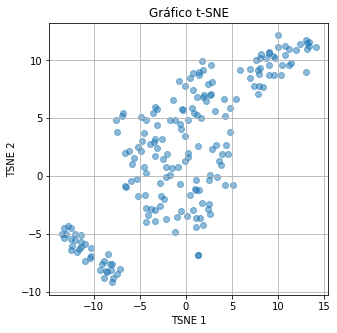

In [32]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Inicializa el modelo t-SNE
tsne = TSNE(n_components=2, random_state=123)
X_tsne = tsne.fit_transform(df.iloc[:, [10,11,12,13,13,30,31,32,33,34,35,36]])   
# Reduce la dimensionalidad
#X_tsne = tsne.fit_transform(df_normalized.iloc[:, 2:37])
#X_tsne = tsne.iloc[:, [0, 4] + list(range(6, 33))]

# Se crea un DataFrame con los datos reducidos
df_tsne = pd.DataFrame(X_tsne, columns=['Componente 1', 'Componente 2'])

# Visualiza los datos t-SNE
plt.figure(figsize=(5, 5))
plt.scatter(df_tsne['Componente 1'], df_tsne['Componente 2'], alpha=0.5)
plt.title('Gráfico t-SNE')
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.grid(True)
plt.show()

<AxesSubplot:xlabel='Componente 1', ylabel='Density'>

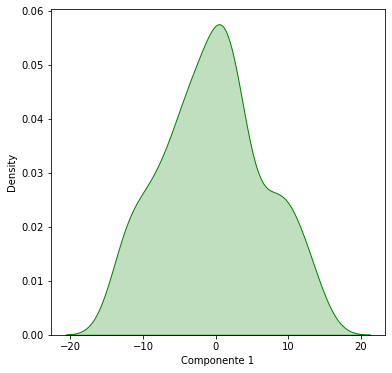

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))

# Histograma de todos los datos
sns.kdeplot(df_tsne["Componente 1"], color='green', fill=True, label='Todos')

In [34]:
df_tsne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Componente 1  198 non-null    float32
 1   Componente 2  198 non-null    float32
dtypes: float32(2)
memory usage: 1.7 KB


In [35]:
#import pandas as pd
df2 = df_normalized.join(df_tsne)

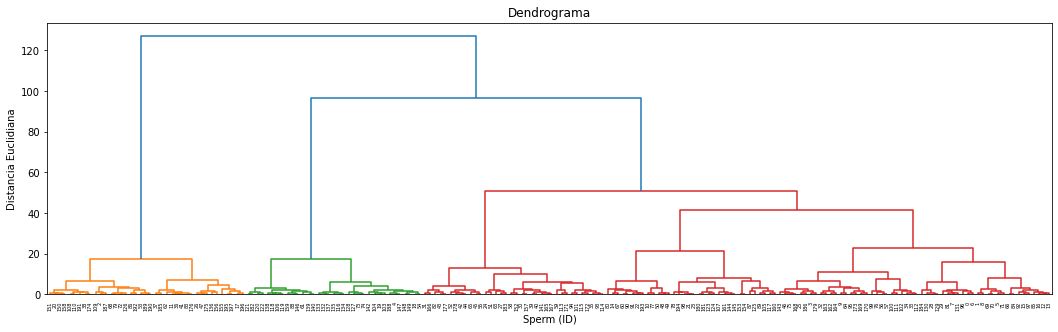

In [36]:
#Se usa la función de pyplot para generar la leyenda del dendrograma
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as hc

#filas_temporales = df2.iloc[[59,86]]
#filtrado = df2.drop([59,86])

plt.figure(figsize=(18, 5))
dend = hc.dendrogram(hc.linkage(X_tsne, method = 'ward'))

#plt.scatter(dend, datos, cmap='viridis')
plt.title('Dendrograma')
plt.xlabel('Sperm (ID)')
plt.ylabel('Distancia Euclidiana')
plt.savefig("Dendrograma1.pdf", format='pdf')
plt.show()

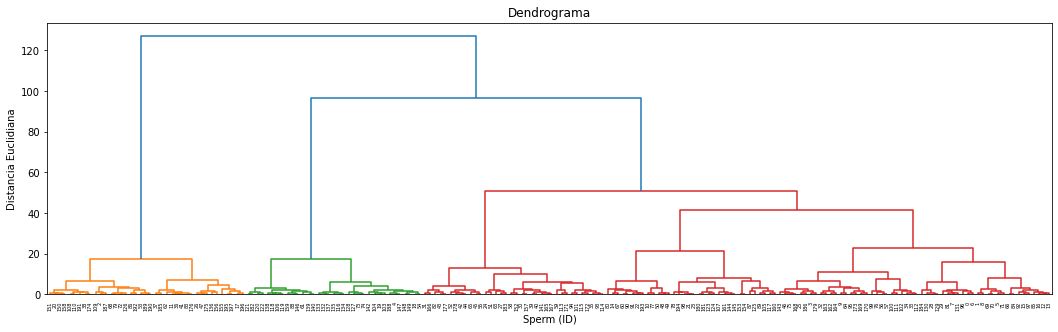

In [37]:
#Se usa la función de pyplot para generar la leyenda del dendrograma
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as hc

#filas_temporales = df2.iloc[[59,86]]
filtrado = df2.drop([59]) #59,86

plt.figure(figsize=(18, 5))
dend = hc.dendrogram(hc.linkage(X_tsne, method = 'ward'))

#plt.scatter(dend, datos, cmap='viridis')
plt.title('Dendrograma')
plt.xlabel('Sperm (ID)')
plt.ylabel('Distancia Euclidiana')
plt.savefig("Dendrograma2.pdf", format='pdf')
plt.show()

In [38]:
import scipy.cluster.hierarchy as hc
from sklearn.cluster import AgglomerativeClustering

clust = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

cluster = clust.fit_predict(X_tsne)
print(cluster)
print(len(cluster))
print(type(cluster))
print(cluster.shape)

[0 0 1 0 2 0 0 0 0 0 0 1 0 0 0 0 0 1 2 2 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 2 0 0 0 0 0 0 2 1 0 0 0 0 0 1 0 0 0 1 2
 2 0 0 0 0 1 0 0 0 1 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 0 1 1 1
 0 0 0 0 0 2 0 2 2 2 2 2 0 0 0 1 2 2 0 0 0 2 2 2 2 1 2 2 2 2 0 2 0 0 0 2 2
 2 2 1 1 0 0 0 1 1 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 2 0 0
 1 0 1 2 1 1 1 1 0 0 1 1 1]
198
<class 'numpy.ndarray'>
(198,)


In [39]:
df2['cluster'] = pd.DataFrame(cluster, columns=['cluster'])
#df3 = filtrado.join(df_cluster)
df2.info()
#print(cluster.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   no.experimento                198 non-null    int64  
 1   tipo.de.muestra               198 non-null    object 
 2   nombre                        198 non-null    object 
 3   fecha                         198 non-null    object 
 4   diagnostico.espermograma      198 non-null    object 
 5   protocolo                     198 non-null    object 
 6   nec                           189 non-null    float64
 7   edad                          198 non-null    int64  
 8   pareja                        150 non-null    object 
 9   t.aox                         198 non-null    object 
 10  rdx.orp                       198 non-null    float64
 11  rdx.cap                       198 non-null    float64
 12  miox.orp.no. norm             198 non-null    float64
 13  miox.

'\ng.axes[0,0].set(ylim=(0,4.0))\ng.map_dataframe(sns.stripplot, x="Time", y="5-HT", \n                hue="Treatment", color="black", \n                alpha=1.0, dodge=True)\ng.set(xlabel=\'Time (minutes)\', ylabel=\'5-HT (ng/mg of tissue)\')\n'

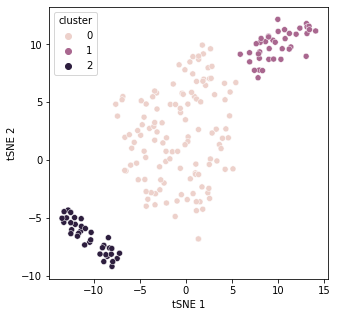

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (5, 5))

#g = sns.FacetGrid(data = df3, col="Capacitation form")
g = sns.scatterplot(data = df2, x = "Componente 1", y = "Componente 2", hue = df2.iloc[:, 48])
g.set(xlabel='tSNE 1', ylabel='tSNE 2')
#g = sns.scatterplot(data = df3, x="Componente 1",y="Componente 2", hue = "k3aucn")#Condition, cluster, k3auc, Capacitation form
"""
g.axes[0,0].set(ylim=(0,4.0))
g.map_dataframe(sns.stripplot, x="Time", y="5-HT", 
                hue="Treatment", color="black", 
                alpha=1.0, dodge=True)
g.set(xlabel='Time (minutes)', ylabel='5-HT (ng/mg of tissue)')
"""

#df = pd.concat([df.iloc[:2], filas_temporales, df.iloc[2:]]).reset_index(drop=True)

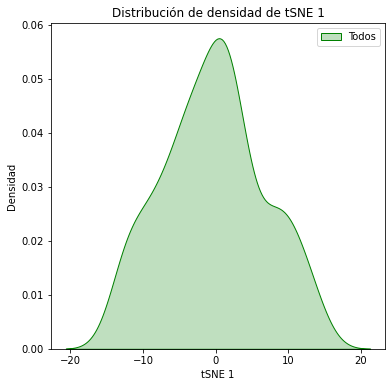

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))

# Histograma de todos los datos (en yellow)
sns.kdeplot(df2["Componente 1"], color='green', fill=True, label='Todos')

# Histograma de Componente 1 > 0 (en azul)
#sns.kdeplot(df_positivo["Componente 1"], color='blue', fill=True, label='tSNE 1 > 0')

# Histograma de Componente 1 < 0 (en rojo)
#sns.kdeplot(df_negativo["Componente 1"], color='red', fill=True, label='tSNE 1 < 0')

plt.xlabel('tSNE 1')
plt.ylabel('Densidad')
plt.title('Distribución de densidad de tSNE 1')
plt.legend()  # Mostrar leyenda
plt.show()

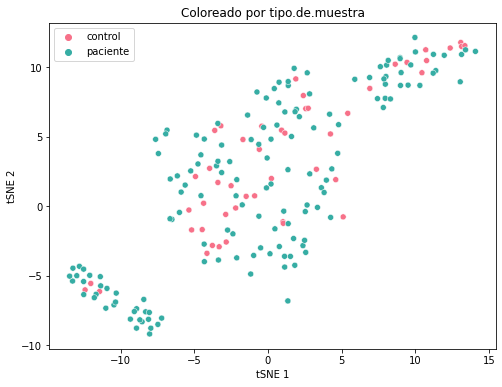

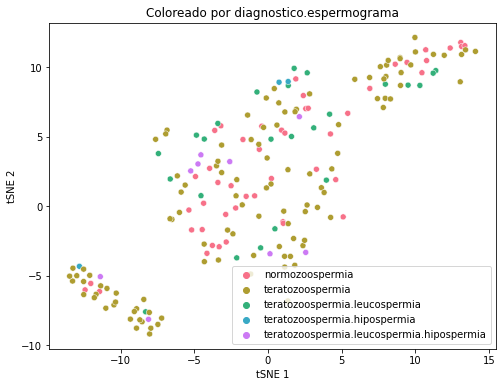

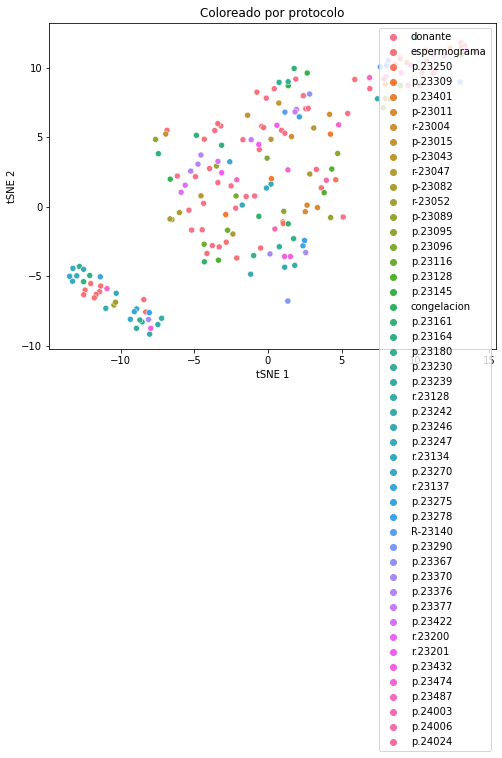

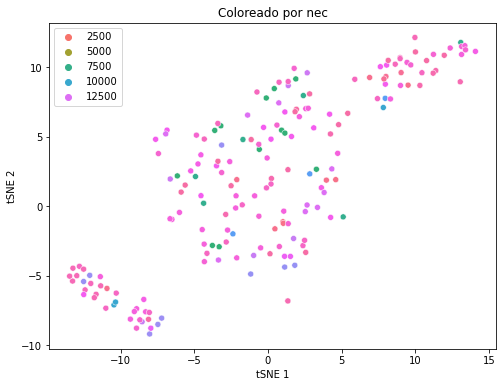

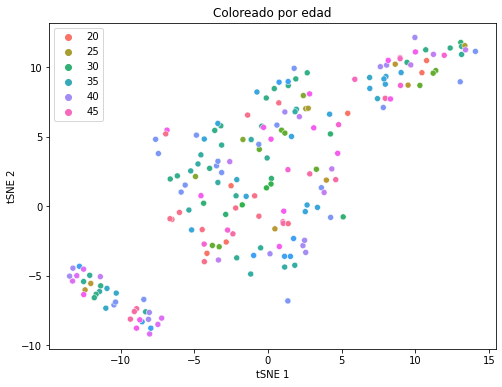

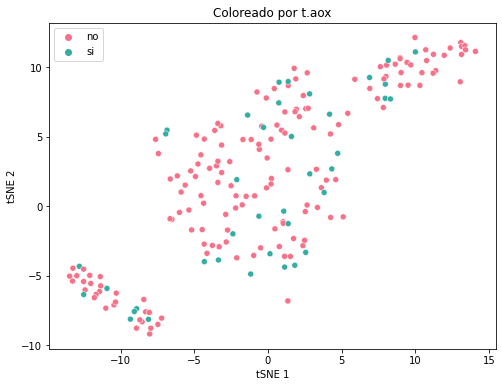

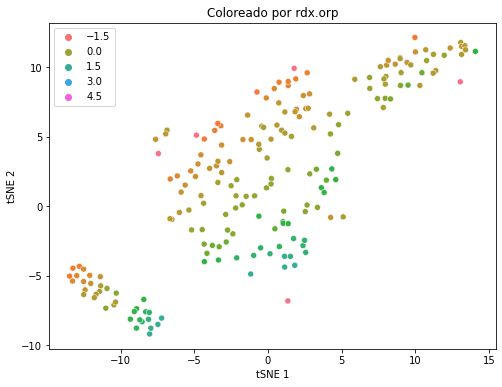

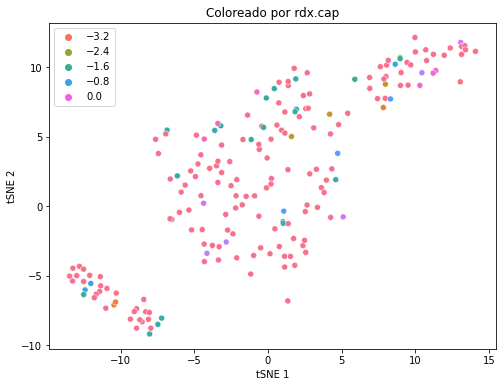

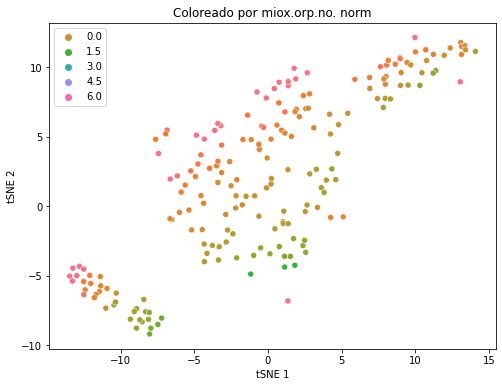

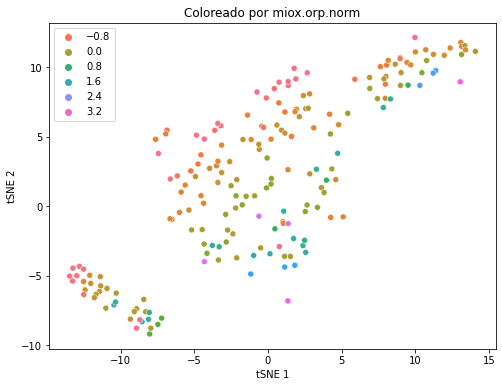

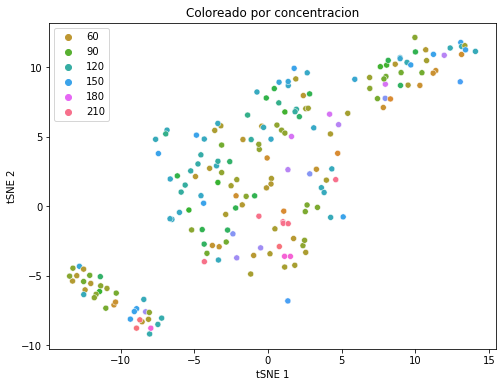

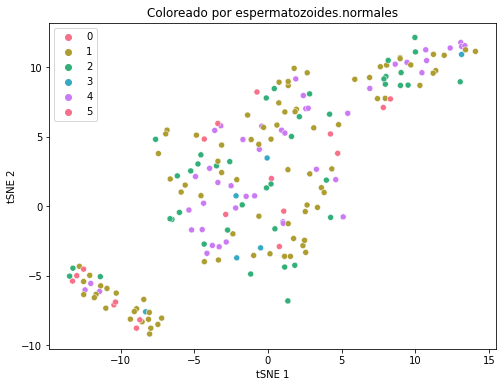

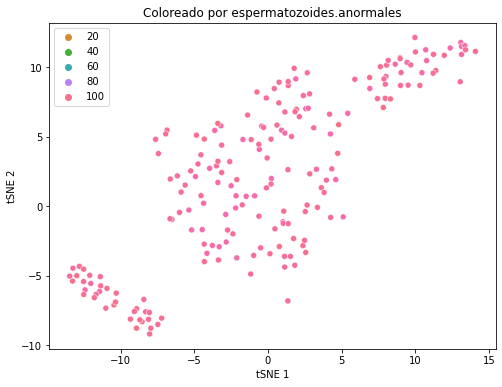

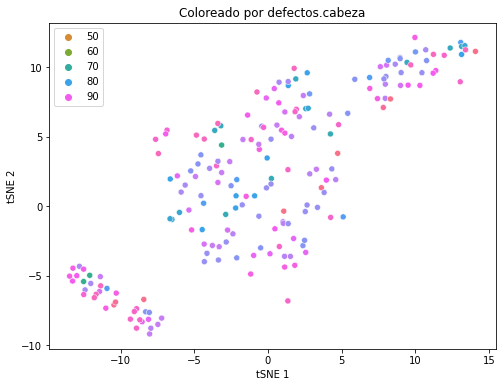

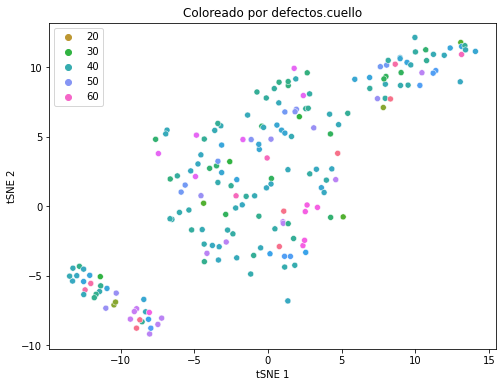

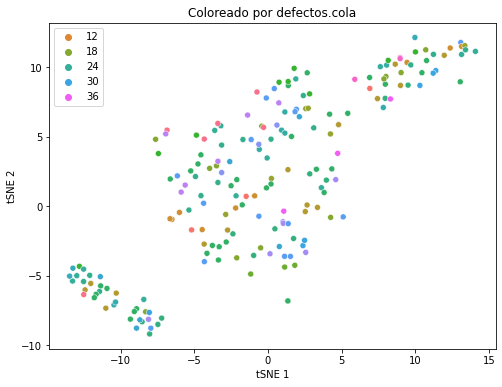

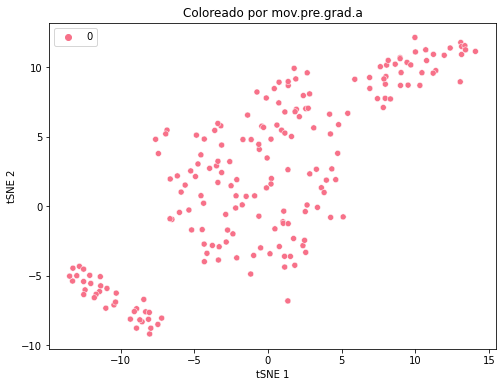

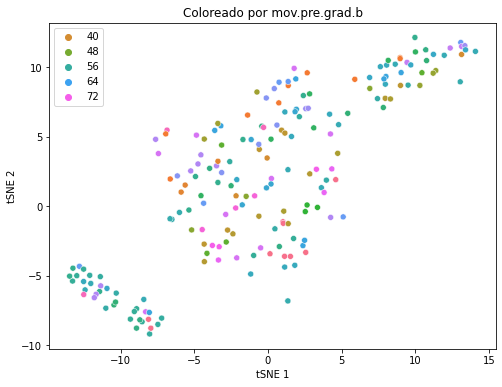

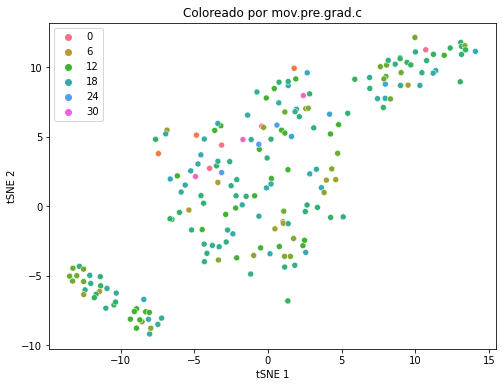

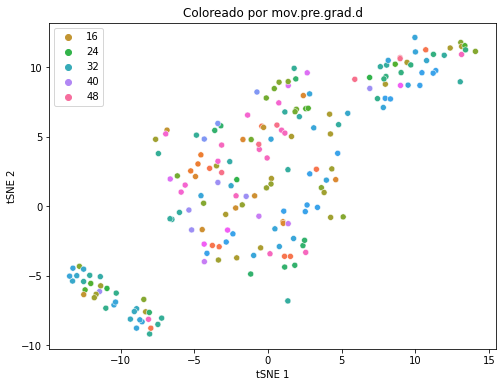

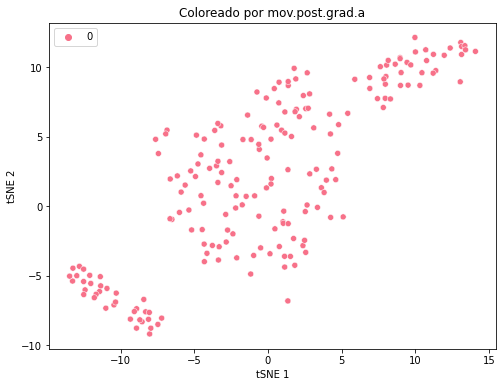

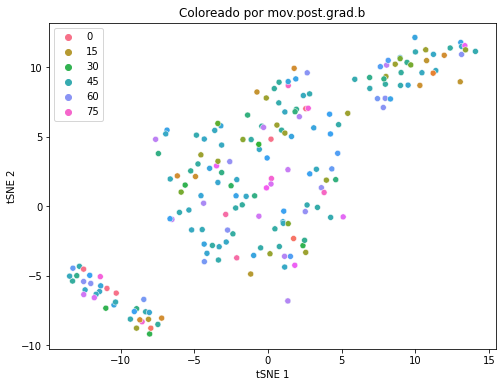

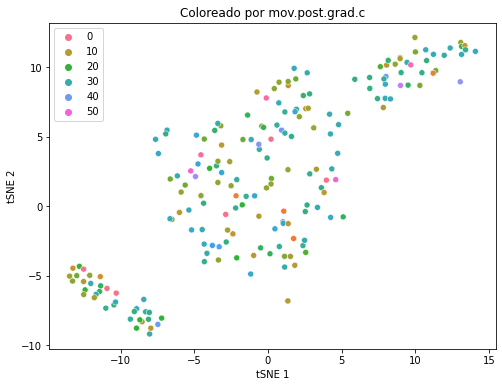

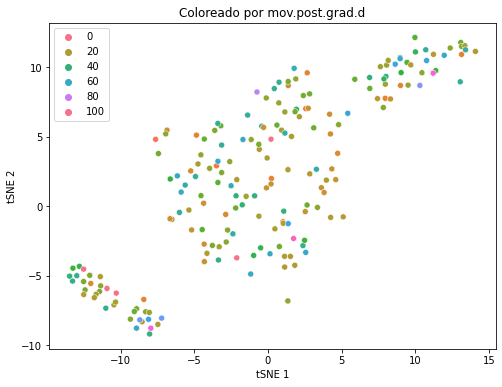

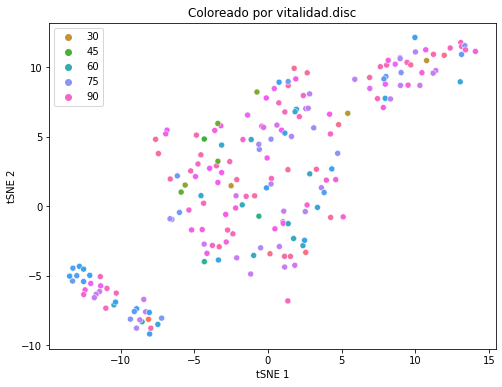

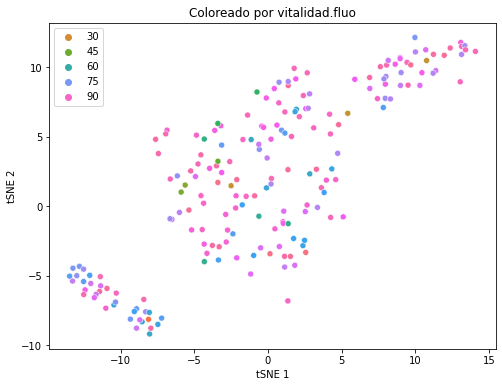

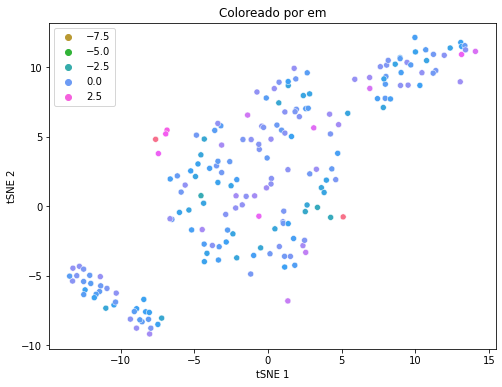

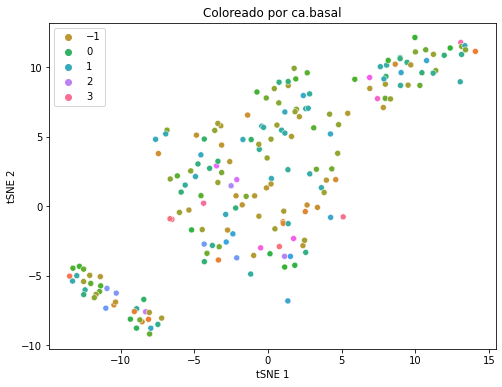

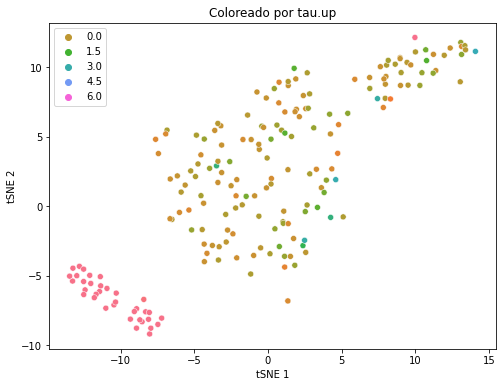

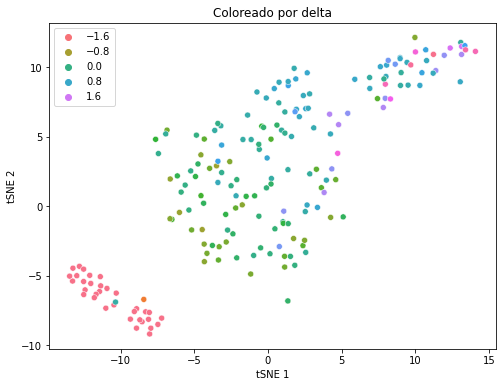

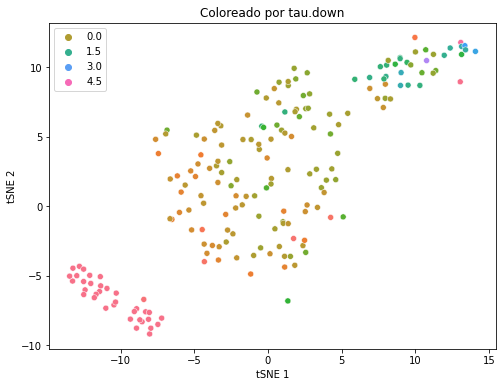

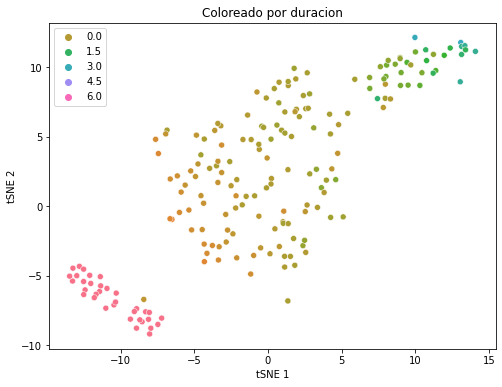

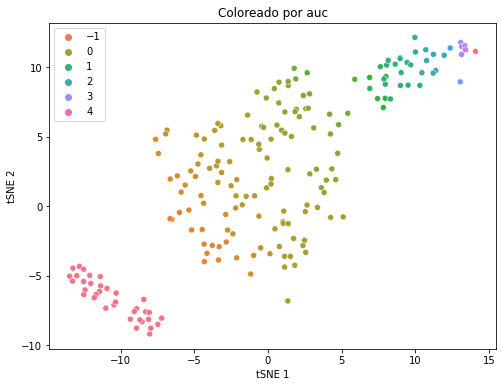

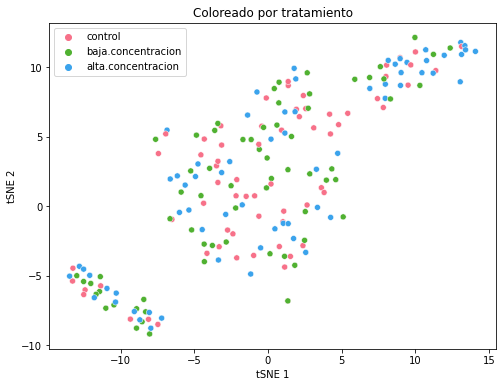

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener las columnas que quieres utilizar para colorear los puntos
indices_de_coloreo = [
    1, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
    21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 45
]  

# Iterar sobre las columnas de coloreo y crear un scatterplot para cada una
for indice in indices_de_coloreo:
    plt.figure(figsize=(8, 6))  # Tamaño del gráfico
    sns.scatterplot(data=df2, x="Componente 1", y="Componente 2",  hue=df2.iloc[:, indice], palette="husl")   
    plt.xlabel('tSNE 1')  # Etiqueta del eje x
    plt.ylabel('tSNE 2')  # Etiqueta del eje y
    columna_nombre = df2.columns[indice]  
    plt.title(f"Coloreado por {columna_nombre}")  # Título del gráfico
    plt.legend(loc='best')  # Ubicación de la leyenda
    plt.show()  # Mostrar el gráfico

In [217]:
#mapeo = [n for n in range(2,10)]
mapeo = df3.iloc[:, 2:10]
mapeo
unique_labels = np.unique(mapeo)

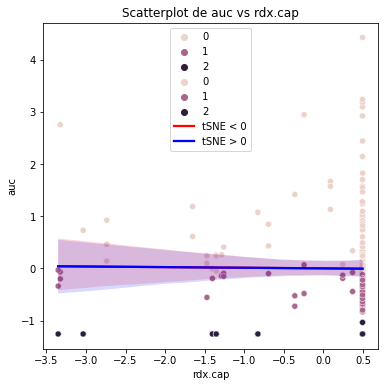

In [148]:
# Filtrar el DataFrame para obtener solo las filas donde tsne1 < 0
#df_filtrado = df3[df3["Componente 1"] > 0]
#df_filtrado2 = df3[df3["Componente 1"] < 0]

# Crear un scatterplot con los datos filtrados
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df2, x="rdx.cap", y="auc", hue="cluster")
#sns.scatterplot(data=df_filtrado, x="k1aucn", y="Fecundation.rate", hue='Condition')
sns.scatterplot(data=df2, x="rdx.cap", y="auc", hue="cluster")
#sns.scatterplot(data=df_filtrado2, x="k1aucn", y="Fecundation.rate", hue='Condition')

sns.regplot(data=df2, x="rdx.cap", y="auc", scatter=False, color='red', label='tSNE < 0')
sns.regplot(data=df2, x="rdx.cap", y="auc", scatter=False, color='blue', label='tSNE > 0')

plt.xlabel('rdx.cap')
#plt.xlim(0,4)
plt.ylabel('auc')
plt.title('Scatterplot de auc vs rdx.cap')
plt.legend(loc='best')
plt.show()


In [149]:
print(df2.head(10))

   no.experimento tipo.de.muestra                         nombre       fecha  \
0               2         control      alejandro.trujillo.flores  09/03/2023   
1               2         control      alejandro.trujillo.flores  09/03/2023   
2               2         control      alejandro.trujillo.flores  09/03/2023   
3               3         control           jesus.gonzalez.gomez  09/03/2023   
4               3         control           jesus.gonzalez.gomez  09/03/2023   
5               3         control           jesus.gonzalez.gomez  09/03/2023   
6               4         control  ulises.gabriel.vazquez.garcia  10/03/2023   
7               4         control  ulises.gabriel.vazquez.garcia  10/03/2023   
8               4         control  ulises.gabriel.vazquez.garcia  10/03/2023   
9               5         control      kalil.eloy.ragnes.tissera  15/03/2023   

  diagnostico.espermograma protocolo      nec  edad pareja t.aox  ...  \
0          normozoospermia   donante      NaN 

In [140]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   no.experimento                198 non-null    int64  
 1   tipo.de.muestra               198 non-null    object 
 2   nombre                        198 non-null    object 
 3   fecha                         198 non-null    object 
 4   diagnostico.espermograma      198 non-null    object 
 5   protocolo                     198 non-null    object 
 6   nec                           189 non-null    float64
 7   edad                          198 non-null    int64  
 8   pareja                        150 non-null    object 
 9   t.aox                         198 non-null    object 
 10  rdx.orp                       198 non-null    float64
 11  rdx.cap                       198 non-null    float64
 12  miox.orp.no. norm             198 non-null    float64
 13  miox.

In [144]:
describe_todos = df2.groupby(["cluster", "tratamiento"]).describe().round(3)
describe_todos.to_csv("describe_todos.csv")

In [ ]:
#resumen_1 = df_stat_1.groupby(['cluster_3', 'condicion']).agg(['count', 'mean', 'std']).reset_index()

In [143]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   no.experimento                198 non-null    int64  
 1   tipo.de.muestra               198 non-null    object 
 2   nombre                        198 non-null    object 
 3   fecha                         198 non-null    object 
 4   diagnostico.espermograma      198 non-null    object 
 5   protocolo                     198 non-null    object 
 6   nec                           189 non-null    float64
 7   edad                          198 non-null    int64  
 8   pareja                        150 non-null    object 
 9   t.aox                         198 non-null    object 
 10  rdx.orp                       198 non-null    float64
 11  rdx.cap                       198 non-null    float64
 12  miox.orp.no. norm             198 non-null    float64
 13  miox.